#CHE 1147 Assignment 3

Name: Danmeng Cui

Student ID: 1004004356

#1.  Feature engineering

Here,  you are going to create features from a very simple dataset:  retail transaction datafrom Kaggle.  The dataset provides the customer ID, date of the transaction and transactionamount as shown in the table below.  Although this may look like a very simple dataset,you will build a wide range of features0.  The features will then be used as inputs in severalmodels in upcoming assignments, in which you will try to predict the client’s response to apromotion campaign.

**1.1  Import the data and create the anchor date columns**

In  order  to  create  features,  you  need  to  create  some  anchor  dates.   The  most  typical  fortransaction data is the end of the month and the year.

1.  Import the dataset astxn1and identify the number of rows2.
2.  The date-format in column ’transdate’ is not standard. Create a new column ’txndate’from ’transdate’ with pd.todatetime and drop the column ’transdate’
3.  Identify the min() and max() of column ’txndate’.
4.  Create  the  column  ’MEDT’:  the  last  day  of  the  month  in  the  ’transdate’  column.DateOffset objects is a simple way to do this in pandas.
5.  Create the column ’YEAR’: the year in the ’transdate’ column.  DatetimeIndex withattribute .year will help you do so.

Thetable outputshould look like the snapshot below. Make sure that the column ’MEDT’works as expected.  E.g.  for the first line ’transdate’:  2018-08-31 is converted to 2018-08-31.A common mistake in implementing the DateOffset transformation is to convert 2018-08-31to 2018-09-30 (a date that falls on the last day of a month is converted to the last day ofthe next month!!!).

In [1]:
#1.1.1
import pandas as pd

txn = pd.read_csv(r"./Retail_Data_Transactions.csv")
print('The number of rows is:', txn.shape[0])

The number of rows is: 125000


There are 125000 rows in the dataset.

In [2]:
#1.1.2
txn['txn_date']=pd.to_datetime(txn['trans_date'])
txn.drop(columns=['trans_date'])

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20
...,...,...,...
124995,CS8433,64,2011-06-26
124996,CS7232,38,2014-08-19
124997,CS8731,42,2014-11-28
124998,CS8133,13,2013-12-14


In [3]:
#1.1.3
print('The minimum txn_date is:', txn['txn_date'].min())
print('The maximum txn_date is:', txn['txn_date'].max())

The minimum txn_date is: 2011-05-16 00:00:00
The maximum txn_date is: 2015-03-16 00:00:00


The minimum txn_date is: 2011-05-16 00:00:00


The maximum txn_date is: 2015-03-16 00:00:00

In [4]:
#1.1.4
from pandas.tseries.offsets import MonthEnd
txn['ME_DT'] = pd.to_datetime(txn['txn_date']) + MonthEnd(1)
txn

,customer_id,trans_date,tran_amount,txn_date,ME_DT
0,CS5295,11-Feb-13,35,2013-02-11,2013-02-28
1,CS4768,15-Mar-15,39,2015-03-15,2015-03-31
2,CS2122,26-Feb-13,52,2013-02-26,2013-02-28
3,CS1217,16-Nov-11,99,2011-11-16,2011-11-30
4,CS1850,20-Nov-13,78,2013-11-20,2013-11-30
...,...,...,...,...,...
124995,CS8433,26-Jun-11,64,2011-06-26,2011-06-30
124996,CS7232,19-Aug-14,38,2014-08-19,2014-08-31
124997,CS8731,28-Nov-14,42,2014-11-28,2014-11-30
124998,CS8133,14-Dec-13,13,2013-12-14,2013-12-31


In [5]:
#1.1.5
txn['YEAR']=pd.DatetimeIndex(txn['txn_date']).year
txn

,customer_id,trans_date,tran_amount,txn_date,ME_DT,YEAR
0,CS5295,11-Feb-13,35,2013-02-11,2013-02-28,2013
1,CS4768,15-Mar-15,39,2015-03-15,2015-03-31,2015
2,CS2122,26-Feb-13,52,2013-02-26,2013-02-28,2013
3,CS1217,16-Nov-11,99,2011-11-16,2011-11-30,2011
4,CS1850,20-Nov-13,78,2013-11-20,2013-11-30,2013
...,...,...,...,...,...,...
124995,CS8433,26-Jun-11,64,2011-06-26,2011-06-30,2011
124996,CS7232,19-Aug-14,38,2014-08-19,2014-08-31,2014
124997,CS8731,28-Nov-14,42,2014-11-28,2014-11-30,2014
124998,CS8133,14-Dec-13,13,2013-12-14,2013-12-31,2013


**1.2  Create features that capture annual spending**

Here  the  approach  is  to  capture  the  client’s  annual  spending.   The  rationale  behind  thisapproach is that the clients spend is not very frequent to capture in a monthly aggregation.

1.  Using groupby and NamedAgg createclntannualaggregations, the annual aggre-gations dataframe:  with sum, mean, std, var, sem, max, min, count as the aggregationfunctions.  A snapshot of the output table is shown below.  Notice that the output is atypical MultiIndex pandas dataframe.
2.  Plot the histogram of the sum and count.
3.  Reset  the  index  and  reshape  the  table  with  the  pivottable  function  to  create  theclntannualaggregationspivottable shown below with 40 columns (why 40?).You  should  expect  columns  with  NaN  values.   Impute  the  NaN  entries  when  youperform the pivottable function and explain your choice of values.
4.  The pivoted object you created is a MultiIndex object with hierarchical indexes.  Youcan  see  the  first  level  (i.e.   0)  in  the  snapshot  above  with  names  ’anntxnamtave’,’anntxnamtmax’  (and  more  as  indicated  by  the  ...)   and  the  second  level  (i.e.   1)with names ’2011’, ’2012’, etc.  You can confirm the multiple levels of the columns withthe following two expressions.
What are your observations regarding the number of levels and the column names?

5.  Finally,  you  want  to  save  the  dataframeclntannualaggregationspivotas  an.xlsx  file  for  future  use  in  the  machine  learning  assignment.   To  do  so,  you  wantto  remove  the  two  levels  in  columns  and  create  a  single  level  with  column  names:’anntxnamtave2011’, ’anntxnamtave2012’, etc.  To do so, use the code snippetbelow prior to saving the dataframe as an Excel file. Describe  what  each  line  of  code  in  the  box  does  and  save  the  output  dataframe  asan Excel fileannualfeatures.xlsx.  A snapshot of the desired final output is shownbelow.
6.  What are the possible disadvantages in capturing client transaction behavior with theannual features described in this section (if any)?

In [6]:
#1.2.1
clnt_annual_aggregations= txn.groupby(by = ['customer_id','YEAR'])
clnt_annual_aggregations=clnt_annual_aggregations.agg(
    ann_txn_amt_sum=pd.NamedAgg(column='tran_amount', aggfunc='sum'),
    ann_txn_amt_ave=pd.NamedAgg(column='tran_amount', aggfunc='mean'),
    ann_txn_amt_std=pd.NamedAgg(column='tran_amount', aggfunc='std'),
    ann_txn_amt_var=pd.NamedAgg(column='tran_amount', aggfunc='var'),
    ann_txn_amt_sem=pd.NamedAgg(column='tran_amount', aggfunc='sem'),
    ann_txn_amt_max=pd.NamedAgg(column='tran_amount', aggfunc='max'),
    ann_txn_amt_min=pd.NamedAgg(column='tran_amount', aggfunc='min'),
    ann_txn_amt_cnt=pd.NamedAgg(column='tran_amount', aggfunc='count'))
clnt_annual_aggregations

ann_txn_amt_sum  ...  ann_txn_amt_cnt
customer_id YEAR                   ...                 
CS1112      2011              212  ...                3
            2012              337  ...                5
            2013              212  ...                3
            2014              212  ...                3
            2015               39  ...                1
...                           ...  ...              ...
CS9000      2011               39  ...                2
            2012              216  ...                4
            2013              147  ...                2
            2014               97  ...                4
            2015               34  ...                1

[31140 rows x 8 columns]

Text(0.5, 1.0, 'Histogram of Annual Transaction Sum')

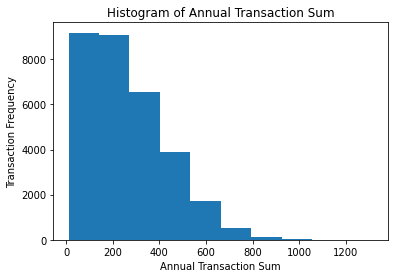

In [7]:
#1.2.2
#Sum
import matplotlib.pyplot as plt
plt.hist(clnt_annual_aggregations['ann_txn_amt_sum'])
plt.xlabel('Annual Transaction Sum')
plt.ylabel('Transaction Frequency')
plt.title('Histogram of Annual Transaction Sum')

Text(0.5, 1.0, 'Histogram of Annual Transaction Count')

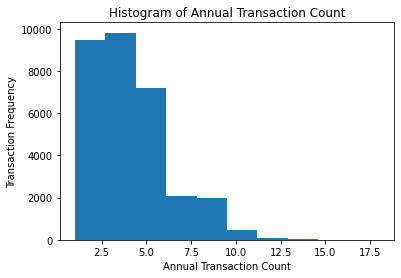

In [8]:
#1.2.2
#Count
import matplotlib.pyplot as plt
plt.hist(clnt_annual_aggregations['ann_txn_amt_cnt'])
plt.xlabel('Annual Transaction Count')
plt.ylabel('Transaction Frequency')
plt.title('Histogram of Annual Transaction Count')

In [9]:
#1.2.3
clnt_annual_aggregations=clnt_annual_aggregations.reset_index()
clnt_annual_aggregations

,customer_id,YEAR,ann_txn_amt_sum,ann_txn_amt_ave,ann_txn_amt_std,ann_txn_amt_var,ann_txn_amt_sem,ann_txn_amt_max,ann_txn_amt_min,ann_txn_amt_cnt
0,CS1112,2011,212,70.666667,22.030282,485.333333,12.719189,96,56,3
1,CS1112,2012,337,67.400000,12.720063,161.800000,5.688585,81,52,5
2,CS1112,2013,212,70.666667,34.501208,1190.333333,19.919282,105,36,3
3,CS1112,2014,212,70.666667,16.862186,284.333333,9.735388,90,59,3
4,CS1112,2015,39,39.000000,NaN,NaN,NaN,39,39,1
...,...,...,...,...,...,...,...,...,...,...
31135,CS9000,2011,39,19.500000,4.949747,24.500000,3.500000,23,16,2
31136,CS9000,2012,216,54.000000,16.772994,281.333333,8.386497,77,37,4
31137,CS9000,2013,147,73.500000,3.535534,12.500000,2.500000,76,71,2
31138,CS9000,2014,97,24.250000,8.261356,68.250000,4.130678,35,16,4


In [10]:
clnt_annual_aggregations_pivot=clnt_annual_aggregations.pivot_table(index='customer_id', columns='YEAR', fill_value='0')
clnt_annual_aggregations_pivot

ann_txn_amt_ave                    ... ann_txn_amt_var                  
YEAR                   2011     2012     2013  ...            2013     2014     2015
customer_id                                    ...                                  
CS1112              70.6667     67.4  70.6667  ...         1190.33  284.333        0
CS1113              81.3333     74.8     85.2  ...           171.2  781.667  745.333
CS1114                 85.2       75     70.4  ...           619.3  726.167        0
CS1115                   87  67.5714  79.5714  ...         110.952   512.25        0
CS1116                58.75  76.6667       59  ...               0    636.8        0
...                     ...      ...      ...  ...             ...      ...      ...
CS8996                   31  33.6667     41.5  ...           144.5    481.6        0
CS8997                   45     39.5  35.1667  ...         441.367       18        0
CS8998                   64     54.4       47  ...            1568  219.667        0
CS8999                   52    25.25       28  ...             103       18        0
CS9000                 19.5       54     73.5  ...            12.5    68.25        0

[6889 rows x 40 columns]

There are 40 columns since there are 8 aggregation variables: sum, mean, std, var, sem, max, min, count, and 5 years: 2011, 2012, 2013, 2014, 2015. Therefore, 40 combinations are set for the columns. 

The NaN values are because there's no transactions made by the client in that year, therefore, I filleld the NaN values with 0. 

In [11]:
#1.2.4
print(clnt_annual_aggregations_pivot.columns.nlevels)
print(clnt_annual_aggregations_pivot.columns)

2
MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_cnt', 2011),
            ('ann_txn_amt_cnt', 2012),
            ('ann_txn_amt_cnt', 2013),
            ('ann_txn_amt_cnt', 2014),
            ('ann_txn_amt_cnt', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_a

There are two levels for the column. From the output, the first element is the first level, and the second element is the second level, which is the 5 years. 

In [12]:
#1.2.5
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1
clnt_annual_aggregations_pivot

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,ann_txn_amt_min_2011,ann_txn_amt_min_2012,ann_txn_amt_min_2013,ann_txn_amt_min_2014,ann_txn_amt_min_2015,ann_txn_amt_sem_2011,ann_txn_amt_sem_2012,ann_txn_amt_sem_2013,ann_txn_amt_sem_2014,ann_txn_amt_sem_2015,ann_txn_amt_std_2011,ann_txn_amt_std_2012,ann_txn_amt_std_2013,ann_txn_amt_std_2014,ann_txn_amt_std_2015,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CS1112,70.6667,67.4,70.6667,70.6667,39,3,5,3,3,1,96,81,105,90,39,56,52,36,59,39,12.7192,5.68859,19.9193,9.73539,0,22.0303,12.7201,34.5012,16.8622,0,212,337,212,212,39,485.333,161.8,1190.33,284.333,0
CS1113,81.3333,74.8,85.2,56.5,73.3333,3,5,5,4,3,94,95,97,97,98,57,51,65,36,44,12.1701,7.6184,5.8515,13.9792,15.7621,21.0792,17.0353,13.0843,27.9583,27.3008,244,374,426,226,220,444.333,290.2,171.2,781.667,745.333
CS1114,85.2,75,70.4,70.8333,79,5,2,5,6,1,97,97,105,95,79,76,53,43,37,79,4.35201,22,11.1292,11.0013,0,9.73139,31.1127,24.8857,26.9475,0,426,150,352,425,79,94.7,968,619.3,726.167,0
CS1115,87,67.5714,79.5714,78.25,55,3,7,7,4,1,102,104,94,98,55,72,41,66,50,55,8.66025,8.25734,3.98125,11.3165,0,15,21.8469,10.5334,22.6329,0,261,473,557,313,55,225,477.286,110.952,512.25,0
CS1116,58.75,76.6667,59,66.6,0,4,3,1,5,0,87,105,59,96,0,41,45,59,40,0,10.6017,17.4005,0,11.2854,0,21.2034,30.1386,0,25.2349,0,235,230,59,333,0,449.583,908.333,0,636.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,31,33.6667,41.5,56,0,2,3,2,6,0,38,38,50,79,0,24,29,33,30,0,7,2.60342,8.5,8.95917,0,9.89949,4.50925,12.0208,21.9454,0,62,101,83,336,0,98,20.3333,144.5,481.6,0
CS8997,45,39.5,35.1667,42,0,2,4,6,2,0,47,49,75,45,0,43,33,21,39,0,2,3.37886,8.57678,3,0,2.82843,6.75771,21.0087,4.24264,0,90,158,211,84,0,8,45.6667,441.367,18,0
CS8998,64,54.4,47,32.5,0,2,5,2,4,0,69,79,75,49,0,59,29,19,13,0,5,10.0529,28,7.41058,0,7.07107,22.4789,39.598,14.8212,0,128,272,94,130,0,50,505.3,1568,219.667,0


The first line of code gets the first level of the pivot column, and convert it to string. The second line of the code gets the second level of th pivot column, and vonvert it to string. The third line of code generates the new columns names, cobining the two levels together for clnt_annual_aggregations_pivot. 

In [13]:
clnt_annual_aggregations_pivot.to_excel("annual_features.xlsx")

1.2.6

The annual purchasing behaviour may not enough to imply the customers purchasing behaviours.It will be more accurate if we can obtain each customers' monthly data. 

**1.3  Create monthly aggregations**
Here,  you  want  to  explore  themonthlysum  ofamounts and count of clients transactions.

1.  Create the dataframe that captures the monthlysum and count of transactions per client (nameitclntmonthlyaggregations).Use   thegroupby function with the Named Aggregationfeature which was introduced in pandas version0.25.0.  Make sure that you name the columnsas shown in the figure sample on the right.
2.  Create  a  histogram  of  both  columns  you  cre-ated.   What  are  your  observations?   What  arethe most common and maximum values for eachcolumn?  How do  they compare with the onesin section 1.2?

Theoutput dataframeshould  look  like  the  snap-shot  shown  on  the  right  for  client  with  ID  CS1112(confirm this with slicing your output dataframe).

Most  clients  in  this  dataset  shop  a  few  timesa  year.   For  example,  the  client  with  ’customerid’CS1112 shown here made purchases in 15 out of 47 months of data in the txn table.  Theinformation in this dataset is ”irregular”; some clients may have an entry for a month, whileothers do not have an entry (e.g.  when they don’t shop for this particular month).

In [15]:
#1.3.1
clnt_monthly_aggregations= txn.groupby(by = ['customer_id','ME_DT'])
clnt_monthly_aggregations=clnt_monthly_aggregations.agg(
    mth_txn_amt_sum=pd.NamedAgg(column='tran_amount', aggfunc='sum'),
    mth_txn_amt_cnt=pd.NamedAgg(column='tran_amount', aggfunc='count'))
clnt_monthly_aggregations.loc['CS1112'] # Confirm with  ID  CS1112

,mth_txn_amt_sum,mth_txn_amt_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


Text(0.5, 1.0, 'Histogram of Mothly Transaction Sum')

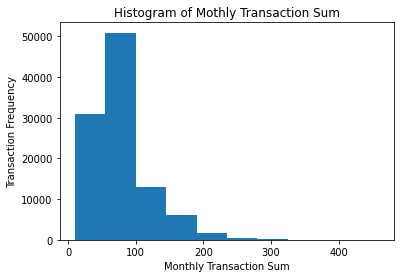

In [16]:
#1.3.2
#Sum
plt.hist(clnt_monthly_aggregations['mth_txn_amt_sum'])
plt.xlabel('Monthly Transaction Sum')
plt.ylabel('Transaction Frequency')
plt.title('Histogram of Mothly Transaction Sum')

Text(0.5, 1.0, 'Histogram of Mothly Transaction Count')

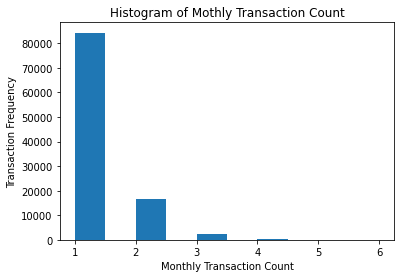

In [17]:
#Count
plt.hist(clnt_monthly_aggregations['mth_txn_amt_cnt'])
plt.xlabel('Monthly Transaction Count')
plt.ylabel('Transaction Frequency')
plt.title('Histogram of Mothly Transaction Count')

The two plots show that the most clients spend less than $100 each transaction and most of them shops once a month. 

By comparing the plots from 1.2.2, the plots are all positive skewed, but the x-axis for the annual plots have a larger range than the monthly plots, since the sum covers more transctions. 

**1.4  Create the base table for the rolling window features**

In order to create the rolling window features (more on this in the next section), you needto create abase tablewithallpossible combinations of ’customerid’ and ’MEDT’. Forexample, customer CS1112 should have 47 entries, one for each month, in which 15 will havethe value of transaction amount and the rest 32 will have zero value for transaction amount.This  will  essentially  help  you  convert  the  ”irregular”clntmonthlyaggregationstableinto a ”regular” one.

 1.  Create the numpy array of the unique elements in columns ’customerid’ and ’MEDT’of thetxntable you created in section 1.1.  Confirm that you have 6,889 unique clientsand 47 unique month-end-dates.

 2.  Use  itertools.product  to  generate  all  the  possible  combinations  of  ’customerid’  and’MEDT’.  Itertools  is  a  Python  module  that  iterates  over  data  in  a  computation-ally efficient way.  You can perform the same task with a for-loop, but the execution may  be  inefficient.   For  a  brief  overview  of  the  Itertools  module  see  here.   If  younamed  the  numpy  arrays  with  the  unique  elements:clntnoandmedt,  then  thecode below will create an itertools.product object (you can confirm this by running:type(basetable)).

 3.  Next, you want to convert the itertools.product objectbasetableinto a pandas ob-ject calledbasetablepd.  To do so, use pd.DataFrame.fromrecords and name thecolumns ’CLNTNO’ and ’MEDT’.
 4.  Finally, you want to validate that you created the table you originally wanted.  Thereare two checks you want to perform:
 Filter client CS1112 and confirm that the dates fall between the min and  maxmonth-dates you identified in section 1.1.  Also, confirm that the snapshot of clientCS1112 has 47 rows, one for each month in the dataset.
 Confirm that thebasetablepdhas 323,783 rows, which is the expected valueof combinations for 6,889 unique clients and 47 unique month-end dates.

In [18]:
#1.4.1
import numpy as np
clnt_no=np.array(txn['customer_id'].unique())
me_dt=np.array(txn['ME_DT'].unique())
print(clnt_no.shape)
print(me_dt.shape)

(6889,)
(47,)


In [19]:
#1.4.2
from  itertools  import  product
base_table = product(clnt_no , me_dt)

In [20]:
#1.4.3
base_table_pd=pd.DataFrame.from_records(base_table, columns=['CLNT_NO', 'ME_DT'])
base_table_pd

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31
...,...,...
323778,CS8077,2013-09-30
323779,CS8077,2011-08-31
323780,CS8077,2012-09-30
323781,CS8077,2014-02-28


In [21]:
#1.4.4 Validate
print(base_table_pd.shape) # 323783 Rows and 2 Columns
unique_clients=base_table_pd['CLNT_NO'].unique()
print(unique_clients.shape) #6889 unique clients
unique_months_end_dates=base_table_pd['ME_DT'].unique()
print(unique_months_end_dates.shape) #47 unique months end dates. 

(323783, 2)
(6889,)
(47,)


**1.5  Create the monthly rolling window features**

With thebasetablepdas a starting point you can convert the irregular transaction datainto the typicaltime seriesdata; data captured at equal intervals.  Feature engineering oftime series data gives you the potential to build very powerful predictive models.

1.  Left-join thebasetablepdwith theclntmonthlyaggregationstable from section1.3  on  [CLNTNO,  MEDT]  to  create  the  tablebaseclntmth.   Comment  on  thefollowing questions in Markdown:

Why do some rows have NaN values?What values will you choose to impute NaN values in the sum and count columns?Perform the imputation you suggest.Confirm that the number of rows is what you expect.  What is the value?How are tablesbaseclntmthandclntmonthlyaggregationsdifferent? Com-ment on the number of rows and the content of each table.

2.  For the next step, the calculation of the rolling window features, you need to sort thedata first by ’CLNTNO’ and then by ’MEDT’ in ascending order.  This is necessaryto create the order for rolling windows, e.g.  2011-05-31, 2011-06-30, etc.

3.  The idea behind rolling window features is captured in the image below.  You calculatesome statistical properties (e.g.  average) based on a window that is sliding.  In theimage below, the window is 7 which means that the last 7 points are used at every rowto calculate the statistical property.

Here, you have to calculate separately the 3, 6 and 12-month rolling window features(tables:rollingfeatures3M, rollingfeatures6M, rollingfeatures12M)  forevery client that calculates the aggregations ’sum’, mean’ and ’max’ for both columns’mthtxnamtsum’ and ’mthtxncnt’.  The steps to achieve this withbaseclntmthas the starting dataframe are:
groupby the client number
select the two columns you want to aggregate
use the rolling function with the appropriate windows
aggregate with ’sum’, mean’ and ’max’
The output of the 3-month rolling window dataframe is shown below.  Also,  answerthe following questions in the .ipynb notebook as Markdown comments.
How many rows appear with NaN values at the beginning of each client for 3, 6and 12-month windows, respectively?  Why do they appear?
How many levels do the index and columns have? Are these MultiIndex dataframes?
Rename the columns as following: ’amtsum3M’, ’amtmean3M’, ’amtmax3M’,’txncntsum3M’, ’txncntmean3M’, ’txncntmax3M’ and follow the same nam-ing convention for 6M and 12M.

4.  Merge  the  4  tables:baseclntmth, rollingfeatures3M, rollingfeatures6M,rollingfeatures12Min  the  outputallrollingfeatures.   It  is  recommended  todrop the level:0 of the rolling features MultiIndex table and join withbaseclntmthon the indexes.Make sure you understand why joining on the indexes preserves the CLNTNO andMEDT for each index.
5.  Confirm that your final outputallrollingfeatureshas 323,783 rows and 22 columnsand save it asmthrollingfeatures.xlsx.

In [22]:
#1.5.1
base_clnt_mth=base_table_pd.join(clnt_monthly_aggregations, on=['CLNT_NO', 'ME_DT'])
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,NaN,NaN
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN
...,...,...,...,...
323778,CS8077,2013-09-30,NaN,NaN
323779,CS8077,2011-08-31,30.0,1.0
323780,CS8077,2012-09-30,NaN,NaN
323781,CS8077,2014-02-28,NaN,NaN


In [23]:
base_clnt_mth=base_clnt_mth.fillna(0)

* The NaN values are due to there are missing values in the 

* clnt_monthly_aggregations tables. 

* I chose 0 to fill the NaN, since the NaN values represents there's no transactions during that month. 

* The number of rows should be 323783, since base_table_pd has 323783 rows.

* We have confirmed that the number of rows for base_clnt_mth is the same as number of rows of base_table_pd, which is 323783.

* base_clnt_mth has 4 columns, 323783 rows. clnt_monthly_aggregations has 2 columns and 103270 rows. clnt_monthly_aggregations only includes the customers who made transactions. 


In [24]:
#1.5.2
base_clnt_mth=base_clnt_mth.sort_values(by=['CLNT_NO', 'ME_DT'], ascending=True )
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt
157064,CS1112,2011-05-31,0.0,0.0
157059,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157070,CS1112,2011-08-31,96.0,1.0
157061,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
295141,CS9000,2014-11-30,0.0,0.0
295126,CS9000,2014-12-31,0.0,0.0
295119,CS9000,2015-01-31,0.0,0.0
295136,CS9000,2015-02-28,0.0,0.0


In [25]:
#1.5.3
rolling_features_3M=base_clnt_mth.groupby(by='CLNT_NO').rolling(3).agg(['sum','mean','max'])
rolling_features_3M

mth_txn_amt_sum                  mth_txn_amt_cnt               
                           sum       mean   max             sum      mean  max
CLNT_NO                                                                       
CS1112  157064             NaN        NaN   NaN             NaN       NaN  NaN
        157059             NaN        NaN   NaN             NaN       NaN  NaN
        157044            56.0  18.666667  56.0             1.0  0.333333  1.0
        157070           152.0  50.666667  96.0             2.0  0.666667  1.0
        157061            96.0  32.000000  96.0             1.0  0.333333  1.0
...                        ...        ...   ...             ...       ...  ...
CS9000  295141             0.0   0.000000   0.0             0.0  0.000000  0.0
        295126             0.0   0.000000   0.0             0.0  0.000000  0.0
        295119             0.0   0.000000   0.0             0.0  0.000000  0.0
        295136             0.0   0.000000   0.0             0.0  0.000000  0.0
        295114            34.0  11.333333  34.0             1.0  0.333333  1.0

[323783 rows x 6 columns]

In [61]:
rolling_features_6M=base_clnt_mth.groupby(by='CLNT_NO').rolling(6).agg(['sum','mean','max'])
rolling_features_6M.head(10)

mth_txn_amt_sum                  mth_txn_amt_cnt               
                           sum       mean   max             sum      mean  max
CLNT_NO                                                                       
CS1112  157064             NaN        NaN   NaN             NaN       NaN  NaN
        157059             NaN        NaN   NaN             NaN       NaN  NaN
        157044             NaN        NaN   NaN             NaN       NaN  NaN
        157070             NaN        NaN   NaN             NaN       NaN  NaN
        157061             NaN        NaN   NaN             NaN       NaN  NaN
        157048           212.0  35.333333  96.0             3.0  0.500000  1.0
        157029           212.0  35.333333  96.0             3.0  0.500000  1.0
        157049           156.0  26.000000  96.0             2.0  0.333333  1.0
        157046           156.0  26.000000  96.0             2.0  0.333333  1.0
        157032            60.0  10.000000  60.0             1.0  0.166667  1.0

In [62]:
rolling_features_12M=base_clnt_mth.groupby(by='CLNT_NO').rolling(12).agg(['sum','mean','max'])
rolling_features_12M.head(15)

mth_txn_amt_sum                  mth_txn_amt_cnt               
                           sum       mean   max             sum      mean  max
CLNT_NO                                                                       
CS1112  157064             NaN        NaN   NaN             NaN       NaN  NaN
        157059             NaN        NaN   NaN             NaN       NaN  NaN
        157044             NaN        NaN   NaN             NaN       NaN  NaN
        157070             NaN        NaN   NaN             NaN       NaN  NaN
        157061             NaN        NaN   NaN             NaN       NaN  NaN
        157048             NaN        NaN   NaN             NaN       NaN  NaN
        157029             NaN        NaN   NaN             NaN       NaN  NaN
        157049             NaN        NaN   NaN             NaN       NaN  NaN
        157046             NaN        NaN   NaN             NaN       NaN  NaN
        157032             NaN        NaN   NaN             NaN       NaN  NaN
        157045             NaN        NaN   NaN             NaN       NaN  NaN
        157051           268.0  22.333333  96.0             4.0  0.333333  1.0
        157062           268.0  22.333333  96.0             4.0  0.333333  1.0
        157073           264.0  22.000000  96.0             4.0  0.333333  1.0
        157065           345.0  28.750000  96.0             5.0  0.416667  1.0

* There are 2, 5, 11 rows appear with NaN values at the beginning of each client for 3, 6, 12 month windows. Therefore, for size=n windows, there will be n-1 NaN values rows. 

* The index and the columns both have 2 levels, so the rolling features dataframe is a multindex dataframe. 

In [28]:
d1={'mth_txn_amt_sum_sum':'amt_sum_3M', 
   'mth_txn_amt_sum_mean':'amt_mean_3M',
   'mth_txn_amt_sum_max':'amt_max_3M',
   'mth_txn_amt_cnt_sum':'txn_cnt_sum_3M',
   'mth_txn_amt_cnt_mean':'txn_cnt_mean_3M',
   'mth_txn_amt_cnt_max':'txn_cnt_max_3M'}
rolling_features_3M.columns = rolling_features_3M.columns.map('_'.join).to_series().map(d1)
rolling_features_3M

amt_sum_3M  amt_mean_3M  ...  txn_cnt_mean_3M  txn_cnt_max_3M
CLNT_NO                                  ...                                 
CS1112  157064         NaN          NaN  ...              NaN             NaN
        157059         NaN          NaN  ...              NaN             NaN
        157044        56.0    18.666667  ...         0.333333             1.0
        157070       152.0    50.666667  ...         0.666667             1.0
        157061        96.0    32.000000  ...         0.333333             1.0
...                    ...          ...  ...              ...             ...
CS9000  295141         0.0     0.000000  ...         0.000000             0.0
        295126         0.0     0.000000  ...         0.000000             0.0
        295119         0.0     0.000000  ...         0.000000             0.0
        295136         0.0     0.000000  ...         0.000000             0.0
        295114        34.0    11.333333  ...         0.333333             1.0

[323783 rows x 6 columns]

In [29]:
d2={'mth_txn_amt_sum_sum':'amt_sum_6M', 
   'mth_txn_amt_sum_mean':'amt_mean_6M',
   'mth_txn_amt_sum_max':'amt_max_6M',
   'mth_txn_amt_cnt_sum':'txn_cnt_sum_6M',
   'mth_txn_amt_cnt_mean':'txn_cnt_mean_6M',
   'mth_txn_amt_cnt_max':'txn_cnt_max_6M'}
rolling_features_6M.columns = rolling_features_6M.columns.map('_'.join).to_series().map(d2)
rolling_features_6M

amt_sum_6M  amt_mean_6M  ...  txn_cnt_mean_6M  txn_cnt_max_6M
CLNT_NO                                  ...                                 
CS1112  157064         NaN          NaN  ...              NaN             NaN
        157059         NaN          NaN  ...              NaN             NaN
        157044         NaN          NaN  ...              NaN             NaN
        157070         NaN          NaN  ...              NaN             NaN
        157061         NaN          NaN  ...              NaN             NaN
...                    ...          ...  ...              ...             ...
CS9000  295141        61.0    10.166667  ...         0.333333             1.0
        295126        61.0    10.166667  ...         0.333333             1.0
        295119        35.0     5.833333  ...         0.166667             1.0
        295136         0.0     0.000000  ...         0.000000             0.0
        295114        34.0     5.666667  ...         0.166667             1.0

[323783 rows x 6 columns]

In [30]:
d3={'mth_txn_amt_sum_sum':'amt_sum_12M', 
   'mth_txn_amt_sum_mean':'amt_mean_12M',
   'mth_txn_amt_sum_max':'amt_max_12M',
   'mth_txn_amt_cnt_sum':'txn_cnt_sum_12M',
   'mth_txn_amt_cnt_mean':'txn_cnt_mean_12M',
   'mth_txn_amt_cnt_max':'txn_cnt_max_12M'}
rolling_features_12M.columns = rolling_features_12M.columns.map('_'.join).to_series().map(d3)
rolling_features_12M

amt_sum_12M  amt_mean_12M  ...  txn_cnt_mean_12M  txn_cnt_max_12M
CLNT_NO                                    ...                                   
CS1112  157064          NaN           NaN  ...               NaN              NaN
        157059          NaN           NaN  ...               NaN              NaN
        157044          NaN           NaN  ...               NaN              NaN
        157070          NaN           NaN  ...               NaN              NaN
        157061          NaN           NaN  ...               NaN              NaN
...                     ...           ...  ...               ...              ...
CS9000  295141         97.0      8.083333  ...          0.333333              1.0
        295126         97.0      8.083333  ...          0.333333              1.0
        295119         81.0      6.750000  ...          0.250000              1.0
        295136         81.0      6.750000  ...          0.250000              1.0
        295114        115.0      9.583333  ...          0.333333              1.0

[323783 rows x 6 columns]

In [31]:
#1.5.4
rolling_features_3M=rolling_features_3M.reset_index('CLNT_NO').drop(columns='CLNT_NO')
rolling_features_6M=rolling_features_6M.reset_index('CLNT_NO').drop(columns='CLNT_NO')
rolling_features_12M=rolling_features_12M.reset_index('CLNT_NO').drop(columns='CLNT_NO')



In [32]:
all_rolling_features=pd.concat([base_clnt_mth, 
                                rolling_features_3M, 
                                rolling_features_6M, 
                                rolling_features_12M], axis=1)

In [33]:
print(all_rolling_features.shape) 

(323783, 22)


In [34]:
#1.5.5
all_rolling_features.to_excel('mth_rolling_features.xlsx')

**1.6  Date-related features: date of the week**

In this section, you will create the date-related features that capture information about theday of the week the transactions were performed.

1.  The  DatetimeIndex  object  you  used  earlier  allows  you  to  extract  many  componentsof  a  DateTime  object.   Here,  you  want  to  use  the  attributesdt.dayofweekand/ordt.dayname()to  extract  the  day  of  the  week  from  column  ’txndate’  of  thetxntable (with Monday=0, Sunday=6).  The expected output below shows both columns.
2.  Create the bar plot that shows the count of transactions per day of the week.
3.  Following the same logic as in section 1.2, generate the features that capture the countof  transactions  per  client,  year  and  day  of  the  week.   The  intermediate  MultiIndexdataframe (with nlevels=3) and the final pivoted output with a single index are shownin the snapshots below.
4.  Confirm that your output has the same number of rows as the final output in section 1.2and save it asannualdayofweekcountspivot.xlsx. How many features/columnsdid you create in this section?
5.  Similarly,  generate  the  features  that  capture  the  count  of  transactions  per  client,month-end-date  and  day  of  the  week.   In  contrast  with  the  annual  pivot  table  inthe previous step, here you want to create the pivot with [’customerid’, ’MEDT’] asindex to obtain the following output dataframe.
6.  Join  withbasetablepdas  you  did  in  section  1.5  and  impute  with  your  choice  ofvalue for NaN. Save the final output asmthdaycounts.xlxs.

In [35]:
#1.6.1
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()
txn

,customer_id,trans_date,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,11-Feb-13,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,15-Mar-15,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,26-Feb-13,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,16-Nov-11,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,20-Nov-13,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...,...
124995,CS8433,26-Jun-11,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,19-Aug-14,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,28-Nov-14,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,14-Dec-13,13,2013-12-14,2013-12-31,2013,5,Saturday


Text(0.5, 1.0, 'Histogram of the Count of Dat of the Week')

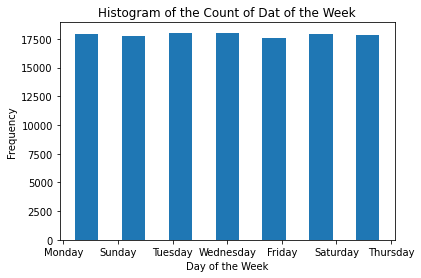

In [36]:
#1.6.2
plt.hist(txn['day_name'], bins=7,  rwidth = 0.5)
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Histogram of the Count of Dat of the Week')

In [37]:
#1.6.3
clnt_annual_day_of_week_counts_aggregations= txn.groupby(by = ['customer_id','YEAR','day_name'])
clnt_annual_day_of_week_counts_aggregations=clnt_annual_day_of_week_counts_aggregations.agg( cnt=pd.NamedAgg(column='tran_amount', aggfunc='count'))
clnt_annual_day_of_week_counts_aggregations

cnt
customer_id YEAR day_name      
CS1112      2011 Friday       1
                 Sunday       1
                 Wednesday    1
            2012 Saturday     1
                 Sunday       3
...                         ...
CS9000      2013 Tuesday      1
            2014 Sunday       2
                 Thursday     1
                 Tuesday      1
            2015 Saturday     1

[93736 rows x 1 columns]

In [38]:
clnt_annual_day_of_week_counts_aggregations_pivot=clnt_annual_day_of_week_counts_aggregations.pivot_table(index='customer_id', columns=['YEAR','day_name'], fill_value='0')
clnt_annual_day_of_week_counts_aggregations_pivot

cnt                         ...                                  
YEAR          2011                         ...   2015                           
day_name    Friday Monday Saturday Sunday  ... Sunday Thursday Tuesday Wednesday
customer_id                                ...                                  
CS1112           1      0        0      1  ...      0        0       0         1
CS1113           1      1        0      1  ...      0        0       0         1
CS1114           0      1        0      1  ...      0        1       0         0
CS1115           0      0        1      1  ...      0        1       0         0
CS1116           1      1        0      0  ...      0        0       0         0
...            ...    ...      ...    ...  ...    ...      ...     ...       ...
CS8996           0      1        0      0  ...      0        0       0         0
CS8997           0      0        0      0  ...      0        0       0         0
CS8998           0      0        0      0  ...      0        0       0         0
CS8999           0      1        1      0  ...      0        0       0         0
CS9000           0      0        0      2  ...      0        0       0         0

[6889 rows x 35 columns]

In [39]:
level_0 = clnt_annual_day_of_week_counts_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_day_of_week_counts_aggregations_pivot.columns.get_level_values(1).astype(str)
level_2 = clnt_annual_day_of_week_counts_aggregations_pivot.columns.get_level_values(2).astype(str)

clnt_annual_day_of_week_counts_aggregations_pivot.columns = level_0 + '_' + level_1+ '_' + level_2
clnt_annual_day_of_week_counts_aggregations_pivot

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,cnt_2012_Sunday,cnt_2012_Thursday,cnt_2012_Tuesday,cnt_2012_Wednesday,cnt_2013_Friday,cnt_2013_Monday,cnt_2013_Saturday,cnt_2013_Sunday,cnt_2013_Thursday,cnt_2013_Tuesday,cnt_2013_Wednesday,cnt_2014_Friday,cnt_2014_Monday,cnt_2014_Saturday,cnt_2014_Sunday,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,3,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,0,0,1,1,0,1,1,0,0,2,1,0,0,1,0,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,1,0,0,0,0,1,0,1,2,0,1,1,1,1,1,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,2,1,1,1,0,1,2,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0,1,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,1,1,2,0,0,0,0,0,0,0
CS8997,0,0,0,0,1,0,1,1,2,0,0,1,0,0,1,1,1,1,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
CS8998,0,0,0,0,0,1,1,2,0,0,0,1,1,1,2,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0


In [40]:
#1.6.4
print(clnt_annual_day_of_week_counts_aggregations_pivot.shape)

(6889, 35)


There are 35 features created in this section, since there are 5 years and 7 days in each week. 

In [41]:
clnt_annual_day_of_week_counts_aggregations_pivot.to_excel("annual_day_of_week_counts_pivot.xlsx")

In [42]:
#1.6.5
clnt_monthly_day_of_week_counts_aggregations= txn.groupby(by = ['customer_id','ME_DT','day_name'])
clnt_monthly_day_of_week_counts_aggregations=clnt_monthly_day_of_week_counts_aggregations.agg( cnt=pd.NamedAgg(column='tran_amount', aggfunc='count'))
clnt_monthly_day_of_week_counts_aggregations


cnt
customer_id ME_DT      day_name      
CS1112      2011-06-30 Wednesday    1
            2011-08-31 Friday       1
            2011-10-31 Sunday       1
            2012-04-30 Sunday       1
            2012-06-30 Sunday       1
...                               ...
CS9000      2014-01-31 Sunday       1
            2014-05-31 Thursday     1
            2014-07-31 Tuesday      1
            2014-08-31 Sunday       1
            2015-03-31 Saturday     1

[121527 rows x 1 columns]

In [43]:
clnt_monthlt_day_of_week_counts_aggregations_pivot=clnt_monthly_day_of_week_counts_aggregations.pivot_table(index=['customer_id','ME_DT'], columns=['day_name'], fill_value='0')
clnt_monthlt_day_of_week_counts_aggregations_pivot

cnt                                                  
day_name               Friday Monday Saturday Sunday Thursday Tuesday Wednesday
customer_id ME_DT                                                              
CS1112      2011-06-30      0      0        0      0        0       0         1
            2011-08-31      1      0        0      0        0       0         0
            2011-10-31      0      0        0      1        0       0         0
            2012-04-30      0      0        0      1        0       0         0
            2012-06-30      0      0        0      1        0       0         0
...                       ...    ...      ...    ...      ...     ...       ...
CS9000      2014-01-31      0      0        0      1        0       0         0
            2014-05-31      0      0        0      0        1       0         0
            2014-07-31      0      0        0      0        0       1         0
            2014-08-31      0      0        0      1        0       0         0
            2015-03-31      0      0        1      0        0       0         0

[103270 rows x 7 columns]

In [44]:
level_0 = clnt_monthlt_day_of_week_counts_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_monthlt_day_of_week_counts_aggregations_pivot.columns.get_level_values(1).astype(str)

clnt_monthlt_day_of_week_counts_aggregations_pivot.columns = level_0 + '_' + level_1
clnt_monthlt_day_of_week_counts_aggregations_pivot

cnt_Friday cnt_Monday  ... cnt_Tuesday cnt_Wednesday
customer_id ME_DT                             ...                          
CS1112      2011-06-30          0          0  ...           0             1
            2011-08-31          1          0  ...           0             0
            2011-10-31          0          0  ...           0             0
            2012-04-30          0          0  ...           0             0
            2012-06-30          0          0  ...           0             0
...                           ...        ...  ...         ...           ...
CS9000      2014-01-31          0          0  ...           0             0
            2014-05-31          0          0  ...           0             0
            2014-07-31          0          0  ...           1             0
            2014-08-31          0          0  ...           0             0
            2015-03-31          0          0  ...           0             0

[103270 rows x 7 columns]

In [45]:
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt
157064,CS1112,2011-05-31,0.0,0.0
157059,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157070,CS1112,2011-08-31,96.0,1.0
157061,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
295141,CS9000,2014-11-30,0.0,0.0
295126,CS9000,2014-12-31,0.0,0.0
295119,CS9000,2015-01-31,0.0,0.0
295136,CS9000,2015-02-28,0.0,0.0


In [46]:
#1.6.6
mth_day_counts = base_table_pd.join(clnt_monthlt_day_of_week_counts_aggregations_pivot, on = ["CLNT_NO", "ME_DT"])
mth_day_counts.fillna(0)
mth_day_counts=mth_day_counts.sort_values(by=['CLNT_NO','ME_DT'])
mth_day_counts

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
157064,CS1112,2011-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157059,CS1112,2011-06-30,0,0,0,0,0,0,1
157044,CS1112,2011-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157070,CS1112,2011-08-31,1,0,0,0,0,0,0
157061,CS1112,2011-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
295141,CS9000,2014-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295126,CS9000,2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295119,CS9000,2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295136,CS9000,2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
mth_day_counts.to_excel("mth_day_counts.xlsx")

**1.7  Date-related features: days since last transaction**

In this date-related features set, you want to capture the frequency of the transactions interms of the days since the last transaction.  This set of features applies only to the monthlyfeatures.
1.  The  starting  point  is  again  thetxntable.   Recall  that  most  clients  have  a  singlepurchase  per  month,  but  some  clients  have  multiple  purchases  in  a  month.   Sinceyou want to calculate the ”days since last transaction”, you want to capture the lasttransaction in a month for every client.Use the appropriate groupby to create the tablelastmonthlypurchasethat cap-tures the last ’txndate’ (aggfunc=max) for every client and month.
2.  Joinbasetablepdwithlastmonthlypurchaseas  you  did  in  section  1.5.   Thesnapshot below shows the output of the created objectlastmonthlypurchasebasefor client CS1112 who made her/his first purchase on June 2011, then no purchase onJuly and made a purchase again on August 2011.  What values will you use to imputethe NaT values here?  NaT stands for ”Not a Timestamp”.
3.  To answer the imputation problem, we have to think what value should we use for sayJuly 2011 for ’lastmonthlypurchase’ ?  The answer is that in July the value for thelast monthly purchase is the previous line value:  2011-06-15.  In other words, for everyclient we want to forward-fill the NaT values.While pandas fillna() method has a method to forward-fill,  here we want to use theapply  and  a  lambda  function  with  the  forward-fill  function  ffill(),  with  the  follow-ing expression:.apply(lambda x:  x.ffill())applied on objectlastmonthly-purchasebasegrouped  by  CLNTNO.  Below,  I  am  showing  a  snapshot  for  lines[92:98] that confirm the transition between clients CS1113 and CS1114.You  can  also  recreate  the  forward-fill  with  the  fillna()  method,  however  there  is  adisadvantage and a reason the.apply()method is preferred here.The forward-fill on the grouped by CLNTNO object is expected to leave NaT valuesfor the first months of every client until they purchase something.  The above snapshotconfirms that for client CS1114.

4.  Subtract  the  two  date  columns  and  convert  the  output  to  .dt.days  to  calculate  thecolumn ’dayssincelasttxn’ as shown in the following snapshot.
5.  Plot a histogram of the ’dayssincelasttxn’.  Based on the values you observe in thehistogram, impute the remaining NaN values (i.e.  for the initial months before a clientmakes a purchase).  Save the columns [’CLNTNO’, ’MEDT’, ’dayssincelasttxn’] asdayssincelasttxn.xlsx.

In [48]:
#1.7.1
last_monthly_purchase=txn[['customer_id','ME_DT','txn_date']]
last_monthly_purchase= last_monthly_purchase.groupby(by = ['customer_id','ME_DT']).agg(last_monthly_purchase=pd.NamedAgg(column='txn_date', aggfunc='max'))
last_monthly_purchase


last_monthly_purchase
customer_id ME_DT                           
CS1112      2011-06-30            2011-06-15
            2011-08-31            2011-08-19
            2011-10-31            2011-10-02
            2012-04-30            2012-04-08
            2012-06-30            2012-06-24
...                                      ...
CS9000      2014-01-31            2014-01-12
            2014-05-31            2014-05-08
            2014-07-31            2014-07-08
            2014-08-31            2014-08-24
            2015-03-31            2015-02-28

[103270 rows x 1 columns]

In [49]:
#1.7.2
last_monthly_purchase_base = base_table_pd.join(last_monthly_purchase, on = ["CLNT_NO", "ME_DT"])
last_monthly_purchase_base.fillna('NaT')
last_monthly_purchase_base=last_monthly_purchase_base.sort_values(by=['CLNT_NO','ME_DT'])
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157059,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157070,CS1112,2011-08-31,2011-08-19
157061,CS1112,2011-09-30,NaT
...,...,...,...
295141,CS9000,2014-11-30,NaT
295126,CS9000,2014-12-31,NaT
295119,CS9000,2015-01-31,NaT
295136,CS9000,2015-02-28,NaT


In [51]:
#1.7.3
last_monthly_purchase_base_fill = last_monthly_purchase_base.groupby(by = 'CLNT_NO').apply(lambda x: x.ffill())
last_monthly_purchase_base_fill.iloc[92:98,:]

,CLNT_NO,ME_DT,last_monthly_purchase
160011,CS1113,2015-02-28,2015-02-09
159989,CS1113,2015-03-31,2015-02-09
101134,CS1114,2011-05-31,NaT
101129,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14
101140,CS1114,2011-08-31,2011-08-24


In [53]:
#1.7.4
last_monthly_purchase_base_fill['days_since_last_txn']=(last_monthly_purchase_base_fill['ME_DT']-last_monthly_purchase_base_fill['last_monthly_purchase']).dt.days
last_monthly_purchase_base_fill

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157059,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157070,CS1112,2011-08-31,2011-08-19,12.0
157061,CS1112,2011-09-30,2011-08-19,42.0
...,...,...,...,...
295141,CS9000,2014-11-30,2014-08-24,98.0
295126,CS9000,2014-12-31,2014-08-24,129.0
295119,CS9000,2015-01-31,2014-08-24,160.0
295136,CS9000,2015-02-28,2014-08-24,188.0


Text(0.5, 1.0, 'Histogram of the Count of days since last transaction')

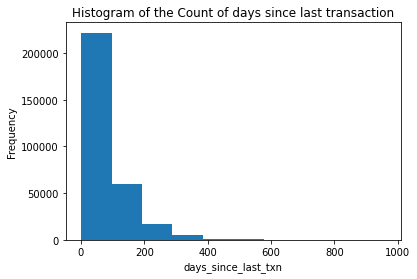

In [55]:
#1.7.5
plt.hist(last_monthly_purchase_base_fill['days_since_last_txn'])
plt.xlabel('days_since_last_txn')
plt.ylabel('Frequency')
plt.title('Histogram of the Count of days since last transaction' )

In [58]:
last_monthly_purchase_base_fill[['days_since_last_txn']] = last_monthly_purchase_base_fill[["days_since_last_txn"]].fillna(method = "bfill")
last_monthly_purchase_base_fill=last_monthly_purchase_base_fill.drop(columns='last_monthly_purchase')

In [60]:
last_monthly_purchase_base_fill.to_excel('days_since_last_txn.xlsx')